Link to Github repository: https://github.com/fridamariejoergensen/CSS_assignment2.git

### Contribution Statement

We, Frida(s206182), Cecilie(s214605), and Marie(s204052), collaborated on Assignment 2 in Jupyter Notebook.

All members collaborated and contributed to multiple parts of the assignment. Much of it was done during the exercises, where we worked together.

In [13]:
import nltk
import math
nltk.download('stopwords')
import pandas as pd
import pickle
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import networkx.algorithms.community as nx_community
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
import networkx.algorithms.community as nx_comm
import netwulf
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud



[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


# Assignment 2

## Part 1: Mixing Patterns and Assortativity

### Exercise 1: Mixing Patterns and Assortativity.

**For each node, compute the fraction of edges that connect to a node that works in the same top field. Find the average value across all nodes.**

In [6]:
# Loading our CSS network 
G = nx.read_gml('css_network_15000.json')

fractions = []
for i in list(nx.get_node_attributes(G, 'topField').keys()):
        #fields[i] = list(nx.get_node_attributes(G, 'topField').values())
        neighbors = G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(G, 'topField')[n] == nx.get_node_attributes(G, 'topField')[i]:
                count += 1
            fractions.append(count / G.degree[i])

av_frac = np.mean(fractions)
print('The average values across all nodes is:' + str(av_frac))

The average values across all nodes is:0.11915768864569051


**Create a new graph, with the same nodes and edges, but where the association between nodes and field is shuffled. Compute the measure above for this randomized graph.**

In [7]:
# Making a copy of the network
copy_G = G.copy()
# Assessing 'topField' attribute
field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
# Shuffeling list of 'topField' attributes
random.shuffle(field_list)
# Setting node attribute as the shuffled attributes
shuffled = dict(zip(copy_G, field_list))
nx.set_node_attributes(copy_G, shuffled, 'topField')

# Computing fraction as above
fractions = []
for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
        neighbors = copy_G.neighbors(i)
        for n in neighbors:
            count = 0
            if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                count += 1
            fractions.append(count / copy_G.degree[i])
av_frac = np.mean(fractions)
print('The average values across all nodes in randomized graph is:' + str(av_frac))

The average values across all nodes in randomized graph is:0.10934824793611925


**Repeat the point above 100 times (at least). Plot the distribution of the values obtained and compare it with the value you have found for the real graph. Is the chance to connect to a member of the same field significantly higher than it would be by chance?**

In [33]:
X = []
# For loop for 100 repetitions
for i in range(100):
    copy_G = G.copy()
    # Assessing 'topField' attributes
    field_list = list(nx.get_node_attributes(copy_G, 'topField').values())
    # Shuffling attribute list 
    random.shuffle(field_list)
    # Setting shuffled attribute list as new attribute
    shuffled = dict(zip(copy_G, field_list))
    nx.set_node_attributes(copy_G, shuffled, 'topField')
    
    # Computing fraction as before
    fractions = []
    for i in list(nx.get_node_attributes(copy_G, 'topField').keys()):
            neighbors = copy_G.neighbors(i)
            for n in neighbors:
                count = 0
                if nx.get_node_attributes(copy_G, 'topField')[n] == nx.get_node_attributes(copy_G, 'topField')[i]:
                    count += 1
                fractions.append(count / copy_G.degree[i])
    X.append(np.mean(fractions))

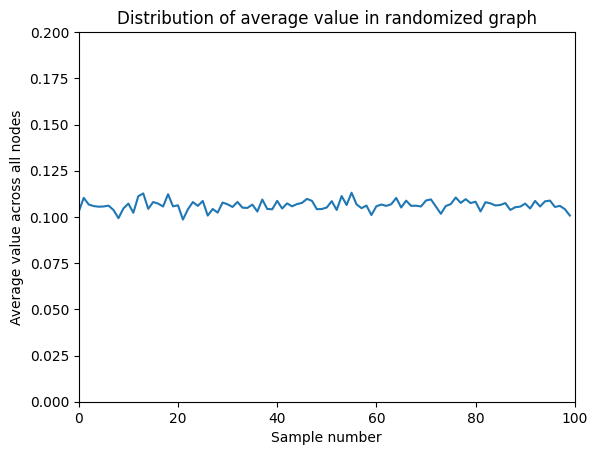

In [34]:
# Plotting the distribution of values
Y = np.arange(100)
plt.plot(Y,X)
plt.xlim(0,100)
plt.ylim(0,1)
plt.ylabel('Average value across all nodes')
plt.xlabel('Sample number')
plt.title('Distribution of average value in randomized graph')
plt.ylim(0,0.2)
plt.show()

The chance to connect to a member of the same field in the real network is not significantly higher than it would be by chance, actually the values are approximately equal.

**Compute the assortativity coefficient with respect to author's field. How do you interpret the value you obtain?**

In [ ]:
def attribute_assortativity_coefficient(G, attribute):
    # get the mixing matrix for the attribute
    mixing_matrix = nx.attribute_mixing_matrix(G, attribute)
    
    # calculate the row and column sums of the mixing matrix
    row_sums = mixing_matrix.sum(axis=1)
    col_sums = mixing_matrix.sum(axis=0)
    
    # calculate the assortativity coefficient using the formula
    numerator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, col_sums)))
    denominator = np.sum(np.multiply(mixing_matrix, np.outer(row_sums, row_sums)))
    assortativity_coefficient = (numerator - denominator) / (1 - denominator)
    
    return assortativity_coefficient

asso_coef_css = attribute_assortativity_coefficient(G, 'topField')
print('Assortativity coefficient for CSS network is:' + str(asso_coef_css))

Assortativity coefficient for CSS network is:-3.4585341738992373e-17


The value found for the assortativity coefficient is very small meaning that people in the same fields doesn't tend to connect (have an edge between them in the network).

**Is the graph assortative with respect to the degree? (e.g. do high-degree scientists tend to link to other high-degree scientists, and low-degree scientists to other low-degree scientists?). Provide an interpretation of your answer.**

In [ ]:
degree_asso_coef = nx.degree_assortativity_coefficient(G)
print('Degree assortativity coefficient for CSS network is:' + str(degree_asso_coef))

Degree assortativity coefficient for CSS network is:-0.07905783854646832


As the values is negative it means that high-degree scientits doesnt tend to link to other high-degree scientists (same for low-degree scientists).

## Part 2: Communities

### Exercise 2: Zachary's karate club:

**Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute)**

In [ ]:
# Visualizing
data_graph = nx.karate_club_graph()
netwulf.interactive.visualize(data_graph)

(None, None)

In [ ]:
# Coloring each node based in club split
club = nx.get_node_attributes(data_graph, 'club')
nx.set_node_attributes(data_graph, club, 'group')
netwulf.interactive.visualize(data_graph)

(None, None)

**Write a function to compute the modularity of a graph partitioning**

In [ ]:
# Function for computing modularity of graph partinioning
def compute_modularity(G, partition):
    m = G.size(weight='weight')

    partition_weight = {p: 0 for p in set(partition.values())}
    partition_degree = {p: 0 for p in set(partition.values())}
    for u, v, data in G.edges(data=True):
        if partition[u] == partition[v]:
            partition_weight[partition[u]] += data['weight']
            partition_degree[partition[u]] += data['weight']

    Q = 0
    for p in set(partition.values()):
        Q += (partition_weight[p] / m) - ((partition_degree[p] / (2 * m)) ** 2)
    return Q

**Explain in your own words the concept of modularity**

Modularity is a measure of how good a division of a larger network into smaller communities is.Communities is defined by having a large amount of connections inside the community, but few connections that go outside the community (meaning they are a densely connected group). When calculating modularity it uses edge-betweeness.

**Compute the modularity of the Karate club split partitioning using the function you just wrote**

In [ ]:
# Compute modularity of the Karate club split partitioning
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}

dict = {}
for i in club1:
    dict[i] = 1
for i in club2:
    dict[i] = 2

club_mod = compute_modularity(data_graph, dict)
print('The modularity for the Karate "club" split is: ' + str(club_mod))

The modularity for the Karate "club" split is: 0.7922827533217144


**We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm.**

**Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.**

In [ ]:
# 5/6. Perform randomization experiment to assess if the modularity is statitically different from 0
rand_graph = data_graph.copy()
print('Number of edges in G before swap: ' + str(len(data_graph.edges)))

# implement the double edge swap algorithm
nx.double_edge_swap(rand_graph, nswap=90, max_tries=500)
print('Number of edges in G before swap: ' + str(len(rand_graph.edges)))


Number of edges in G before swap: 78
Number of edges in G before swap: 78


**Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.**

In [ ]:
import networkx.algorithms.community as nx_comm
modularities = []

for i in range(1000):
    rand_G = data_graph.copy()
    nx.double_edge_swap(rand_G, nswap=90, max_tries=500)
    
    com_hi = {x for x,y in rand_G.nodes(data=True) if y['group']=='Mr. Hi'}
    com_of = {x for x,y in rand_G.nodes(data=True) if y['group']=='Officer'}
    
    modularities.append(nx_comm.modularity(rand_G, [com_hi, com_of]))

**Compute the average and standard deviation of the modularity for the random network.**

In [ ]:
# Average and standard deviation
av = np.mean(modularities)
std = np.std(modularities)

print('Average of modularities is ' + str(av))
print('Standard deviation of modularities ' + str(std))

Average of modularities is 0.07280402723119822
Standard deviation of modularities 0.05169662751526167


**Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).**

The actual modularity is 0.39143756676224206


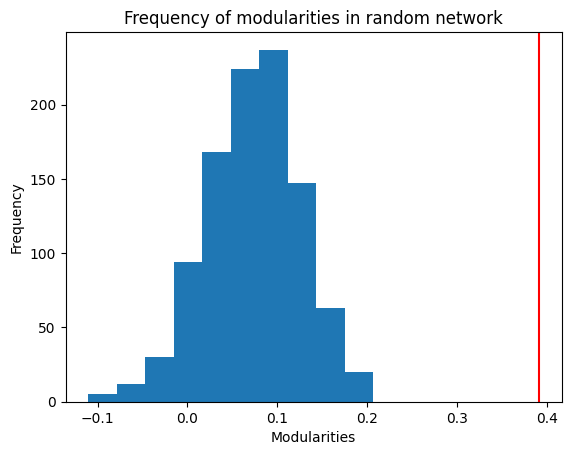

In [ ]:
actual_mod = nx_comm.modularity(data_graph, [{x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}, {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}])

print('The actual modularity is ' + str(actual_mod))

plt.hist(modularities)
plt.xlabel('Modularities')
plt.ylabel('Frequency')
plt.title('Frequency of modularities in random network')
plt.axvline(actual_mod, color='red')

**Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?**

No, the club split is not a good partitioning, which is seen as the distribution doesn't even hold the actual value. We performed a randomization experiment to check if the split into clubs can be considered to be the same as if they were randomly assigned to each club. This is also the reason why we preserve the nodes, such that this specific comparison can be made.

**Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?**

In [ ]:
# Value of modularity using Louvain-algorithm  
communities_z = nx_comm.louvain_communities(data_graph)
modularity_z = nx_comm.modularity(data_graph, communities_z)
print('The modularity of Louvain algorithm is ' + str(modularity_z))

The modularity of Louvain algorithm is 0.4438541256723075


The value found by Louvain is higher than the actual value found for the 'club' split. This comparison reveals that the Louvain algorithm has found better communities than dividing the network by the clubs.

**Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.**

In [ ]:
# Compute confusion matrix
club1 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Mr. Hi'}
club2 = {x for x,y in data_graph.nodes(data=True) if y['group']=='Officer'}
comm_club = [club1, club2]

D = np.zeros((len(communities_z), len(comm_club)))

for i in range(len(comm_club)):
    for n in comm_club[i]:
        for j in range(len(communities_z)):
            if n in communities_z[j]:
                D[j][i] += 1

print('Confusion matrix is: ')
print(D)

Confusion matrix is: 
[[ 5.  0.]
 [ 1. 13.]
 [11.  0.]
 [ 0.  4.]]


From the confusion matrix we see that the Louvain algorithm divided the network into 4 communities. As each entry in the confusion matrix corresponds to the number of nodes each of the communities the club split have in common with each of the communities in the Louvain split it is clear, that only 1 node has floated to a club split while all others have every node from each Louvain community in the same club split. Also it tells us that the club split can be splitted once more into smaller communities, since 2 of the Louvain communities correspond to each club split.

### Exercise 3: Community detection on the network of Computational Social Scientists.

**Consider the network you built in Week 4.**

**Use the Python Louvain-algorithm implementation to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0?**

In [12]:
# Loading our CSS network
G = nx.read_gml('css_network_15000.json')

# Finding communities
import networkx.algorithms.community as nx_community
communities = nx_community.louvain_communities(G)

no_comm = len(communities)
print('The number of communities is ' + str(no_comm))

size_comm = []
for i in range(no_comm):
    size_comm.append(len(communities[i]))
print('The sizes of the communities are: ' + str(size_comm))

modularity = nx_community.modularity(G, communities)
print('The modularity is ' + str(modularity))

The number of communities is 752
The sizes of the communities are: [1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 61, 1, 68, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 12, 1, 57, 1, 1, 1, 2, 1, 50, 1, 3, 1, 1, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 44, 1, 1, 1, 1, 2, 1, 74, 1, 1, 1, 1, 1, 2, 1, 7, 1, 1, 1, 2, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 1, 19, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 49, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 8, 1, 1, 1, 6, 1, 4, 1, 1, 1, 1, 20, 4, 2, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 10, 2, 2, 3, 2, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 21, 1, 1, 1, 11, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 62, 1, 1, 5, 7, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 1, 113, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 1, 57, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1

The value of modularity is significantly different from 0, so it seems fair to say that the computational social scientists are divided into smaller communities.

**Visualize the network, using netwulf (see Week 5). This time assign each node a different color based on their community. Describe the structure you observe.**

In [13]:
# Visualize network
binary_comm = {}
for i in G.nodes:
    for j in communities:
        if i in j:
            binary_comm[i] = communities.index(j)

nx.set_node_attributes(G, binary_comm, 'group')
netwulf.interactive.visualize(G)

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 56565)
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2800.0_x64__qbz5n2kfra8p0\lib\http\server.py", line 668, in __init__
    super().__init__(*args, **kwargs)
  File "C:\Program Files\Windo

(None, None)

The structure of the network is a bit cluttered in the middle, and then many lonely nodes around as well as nodes with a small amount of connections. This network has only been made on original 15.000 authorIds from which papers were gathered and filtered, because we didn't have the resources to run all the graph and network scripts on our large data set with 120.000 authorIds.

In [14]:
from networkx.readwrite import json_graph
css_network_update = json_graph.node_link_data(G)
nx.write_gml(G, "css_network_update.json")

**Make sure you save the assignment of authors to communities.**

## Part 3: TF-IDF.

### Exercise 4: TF-IDF and the Computational Social Science communities.

TF-IDF is an approach for representing text that involves the product of two components, term frequency (TF) and inverse document frequency (IDF). The term frequency is determined by dividing the number of occurrences of a specific word in a sentence by the total number of words in that sentence. The inverse document frequency is calculated by taking the logarithm of the total number of sentences in the corpus divided by the number of sentences that contain the specific word. The resulting TF-IDF score is obtained by multiplying the TF and IDF values for each word.

An advantage of TF-IDF over other text representation techniques, such as the bag of words model, is its ability to give an estimation of the semantic meaning of words. While the bag of words model simply represents words as binary values (either present or absent), TF-IDF scores indicate the relative importance of words in different sentences by comparing their scores. For example, if a word is present in every sentence of a corpus, its IDF value would be log(1)=0, resulting in a TF-IDF score of 0 for that word, indicating that it does not convey any special meaning in those sentences.


**Find the assignment of each author to their network community, and the degree of each author.**


In [14]:

# Loading our CSS network
css_graph = nx.read_gml('css_network_update.json')


In [15]:
G = css_graph
communities = nx_community.louvain_communities(G)

# Dictionary for community assignments and degree of each author
data = {'authorIds': [], 'Community': [], 'Degree': []}

# Loop over each author in the network
for author in G.nodes():
    data['authorIds'].append(author)
    
    for i, community in enumerate(communities):
        if author in community:
            data['Community'].append(i)
            break
    
    data['Degree'].append(G.degree(author))

# Create dataframe
df_community = pd.DataFrame(data)
df_community


,authorIds,Community,Degree
0,1755938,54,5
1,1729566,28,7
2,38524587,407,1
3,81840293,269,1
4,4006636,6,7
...,...,...,...
2147,93460753,747,0
2148,35996413,748,0
2149,1403610681,749,0
2150,50473003,199,1


In [16]:
# Group dataframe by community
df_grouped = df_community.groupby('Community')

# Loop over each community
for community, group in df_grouped:
    author_ids = group['authorIds'].tolist()
    # print(f"Community {community}: {author_ids}")
    

In [17]:
# Loading paper pickle (and exploding column authorId)
with open('css_papers_15000.pickle', "rb") as f:
        css_papers = pickle.load(f)    
        css_papers = css_papers.explode('authorIds')  
css_papers.shape


(20939, 8)

In [18]:
merged_df = df_community.merge(css_papers, on='authorIds')
merged_df.shape

(8814, 10)

In [19]:
# Loading abstract pickle
with open('css_abstract_15000.pickle', "rb") as f:
        css_abstract = pickle.load(f)

In [20]:
# Load stop words
stop_words = set(stopwords.words('english'))

def tokenize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token != 'none' and token != 'nan']
    return tokens

# Tokenize and save in new column 'tokens'
css_abstract['abstract'] = css_abstract['abstract'].astype(str)
css_abstract['tokens'] = css_abstract['abstract'].apply(tokenize_text)

css_abstract.shape

(6709, 3)

In [21]:
Complete_df = merged_df.merge(css_abstract, on='paperId')
Complete_df.shape

(11244, 12)

**Create several *large documents, one for each community*. Each document includes all the tokens of abstracts written by members of a given community.**

In [22]:
# create a dictionary to store tokens for each community
community_tokens = {}

# loop through each community
for c in Complete_df["Community"].unique():
    
    # filter merged_data to get only papers written by members of community c
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    # create an empty list to store tokens from all papers written by members of community c
    community_tokens[c] = []
    
    # loop through each paper written by members of community c
    for paper in papers:
        
        # get tokens for the paper
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        
        # add tokens to the list for the community
        community_tokens[c] += tokens


**Find the top 5 terms within the top 5 communities (by number of authors).**

In [23]:
from collections import Counter
# Top 5 communities 
top_communities5 = Complete_df["Community"].value_counts().head(5).index.tolist()

for c in top_communities5:
    print("Community:", c)
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        # get tokens
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        # add tokens to list for specific community
        tokens_list += tokens
    token_freq = Counter(tokens_list)
    
    print("Top 5 tokens:")
    for token, freq in token_freq.most_common(5):
        print(token, freq)
    
    print("----------------------------")



Community: 6
Top 5 tokens:
social 642
model 515
market 411
show 410
data 409
----------------------------
Community: 538
Top 5 tokens:
social 570
data 514
mobility 389
model 304
show 260
----------------------------
Community: 102
Top 5 tokens:
social 617
ties 295
data 250
show 239
economic 207
----------------------------
Community: 198
Top 5 tokens:
social 296
network 206
cooperation 205
mobility 204
model 184
----------------------------
Community: 54
Top 5 tokens:
social 582
political 410
data 373
covid 359
survey 342
----------------------------


**Describe similarities and differences between the communities.**
<br>
"Social" and "data" are common tokens in multiple communities. For example, both communities 142, 89 and 270 have "social" and "data" among their top 5 tokens. This makes sense, since most communities within CCS are likely to be interested in social data analysis. "Show" is a common token among multiple communities as well, including communities 142, 89, 270 and 14. In general we can see that many of the top tokens are being shared. However, there are some unique tokens for each community. Community 142 has "model" and "market" indicating an interest in one subfield of CSS and while community 14 has "political", "survey" and "covid", indicating an interest in another subfield, possibly surveying about political changes dure to covid.


**Why aren't the TFs not necessarily a good description of the communities?**

However, the TFs are not necessarily a good description or basis of comparison for the communities. It gives a very superficial insight into a community, as it only helps identify the most frequent words used by the community, but not their context. Some words may have high TF within a specific community, but they may not be unique to that community and may not provide much information about the community's characteristics or differences from other communities. The size of the communities also varies a lot. Taking this into account, the TFs for the same word in the different communities may not be directly comparable. 


In [24]:
# Dictionary for IDF scores
idf_scores = {}

for c in top_communities5:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        # get tokens
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        # add tokens to the list
        tokens_list += tokens
    token_freq = Counter(tokens_list)
    
    # calculate IDF score for each token
    idf_scores[c] = {}
    for token, freq in token_freq.items():
        idf_scores[c][token] = math.log(len(papers) / freq)

for c in top_communities5:
    print("Community:", c)
    top_idf_scores = sorted(idf_scores[c].items(), key=lambda x: x[1], reverse=True)[:5]
    for token, score in top_idf_scores:
        print(token, score)
    print("----------------------------")

Community: 6
unfairly 7.011213987350367
pseudopolynomial 7.011213987350367
compelled 7.011213987350367
responsiveness 7.011213987350367
trick 7.011213987350367
----------------------------
Community: 538
environmentally 6.7226297948554485
socioculturally 6.7226297948554485
owners 6.7226297948554485
navigate 6.7226297948554485
contextspecific 6.7226297948554485
----------------------------
Community: 102
econometric 6.490723534502507
segment 6.490723534502507
clusterlevel 6.490723534502507
differs 6.490723534502507
conventional 6.490723534502507
----------------------------
Community: 198
excitable 6.202535517187923
riding 6.202535517187923
sensitivities 6.202535517187923
sensitivity 6.202535517187923
prone 6.202535517187923
----------------------------
Community: 54
detecting 6.1903154058531475
strikes 6.1903154058531475
protest 6.1903154058531475
august 6.1903154058531475
logistic 6.1903154058531475
----------------------------


**Calculate TF-IDF. Do that for the top 9 communities**

In [25]:
top_communities9 = Complete_df["Community"].value_counts().nlargest(9).index.tolist()

idf_scores2 = {}
for c in top_communities9:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        tokens_list += tokens
        
    token_freq = Counter(tokens_list)

    idf_scores2[c] = {}
    for token, freq in token_freq.items():
        idf_scores2[c][token] = math.log(len(papers) / freq)

# Dictionary for TF-IDF scores
tfidf_scores = {}

for c in top_communities9:
    papers = Complete_df.loc[Complete_df["Community"] == c, "paperId"].tolist()
    
    tokens_list = []
    for paper in papers:
        tokens = Complete_df.loc[Complete_df["paperId"] == paper, "tokens"].tolist()[0]
        tokens_list += tokens
    
    token_freq = Counter(tokens_list)
    
    # calculate TF-IDF score
    tfidf_scores[c] = {}
    for token, freq in token_freq.items():
        tf = freq / len(tokens_list)
        idf = idf_scores2[c][token]
        tfidf_scores[c][token] = tf * idf
    
    # Top 10 TF words for the community
    top_tf_scores = sorted(token_freq.items(), key=lambda x: x[1], reverse=True)[:10]
    print("Community", c, "top 10 TF words:")
    for token, score in top_tf_scores:
        print(token, score)
    print("----------------------------")
    
    # Top 10 TF-IDF words for the community
    top_tfidf_scores = sorted(tfidf_scores[c].items(), key=lambda x: x[1], reverse=True)[:10]
    print("Community", c, "top 10 TF-IDF words:")
    for token, score in top_tfidf_scores:
        print(token, score)
    print("----------------------------")

Community 6 top 10 TF words:
social 642
model 515
market 411
show 410
data 409
information 382
two 328
mechanism 321
study 319
agents 316
----------------------------
Community 6 top 10 TF-IDF words:
data 0.0044132341958893415
show 0.004413193926456294
market 0.004413127273192943
information 0.004404104870842115
two 0.0043222894325312755
mechanism 0.004304953154501457
study 0.004299698197572603
agents 0.004291561166860497
model 0.004273173484959703
analysis 0.004252702155876232
----------------------------
Community 538 top 10 TF words:
social 570
data 514
mobility 389
model 304
show 260
network 239
political 213
epidemic 207
population 197
study 186
----------------------------
Community 538 top 10 TF-IDF words:
model 0.005806546049395321
show 0.005738233600485856
network 0.005657075901436352
mobility 0.005608392066767849
political 0.0055076150092710635
epidemic 0.00546481494699032
population 0.005386091304990495
study 0.005288334989599945
analysis 0.005278846003813399
however 0.00519

**Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?** 
<br> <br>
The top 10 TF-IDF words are more descriptive than the TF words. This makes sense, since it weights the frequency by the inverse document frequency. In general, the tokens with the highest IDF scores tend to be more specific for the community and less commonly used, so including the IDF scores allows us to see which words set the communities apart, which is often a good indication of what makes the community special aswell. Analyzing communities of authors based on the top TF-IDF words is a better approach than TF in order to capture unique characteristics for each.

**List the top 3 authors (by degree)**

In [26]:
# Top 3 authors from 9 biggest communities
largest_communities = df_community['Community'].value_counts().nlargest(9).index.tolist()
community_df_filtered = df_community.loc[df_community['Community'].isin(largest_communities)]
community_df_filtered_sorted = community_df_filtered.sort_values(by=['Community', 'Degree'], ascending=[True, False])
top_authors_by_community = community_df_filtered_sorted.groupby('Community').head(3)

print(top_authors_by_community)

     authorIds  Community  Degree
205  145472333          6      18
26     3371403          6      17
217    1783914          6      15
34     1684687         11      29
811    2140221         11      13
522    1831395         11      11
228    3185333         54      61
409    3306556         54      21
682    3026226         54      13
186    1682773        102      50
389    1705156        102      29
275    1776476        102      28
5      2592694        120      21
470   40660541        120      14
503  144041798        120      13
170    1795135        198      24
236  143634219        198      20
345    2408791        198      14
56     1733303        340      40
145    1712423        340      19
76   144240725        340      18
287    2698329        527      35
734    1985987        527      25
360    2414047        527      14
348    3329961        538      38
43     2349638        538      29
583    2836702        538      26


### Exercise 5: The Wordcloud.

**Create word-cloud for each community. Print the names of the top three authors in each community.**

In [27]:
import os
import pickle

# Code to load pickle with paper dataset from file SemanticScholarAPI:
def loadPickles(picklePath):
    if os.path.isfile(picklePath+"/finalAuthorDf"):
        authordf = pickle.load( open(picklePath+"/finalAuthorDf", "rb" ) )
        print("Opened pickle with author dataframe of length {}.".format(len(authordf)))
        if type(authordf['aliases'][len(authordf)-1][0]) == list:
            papersClean2 = DoubleLists2(authordf)
            #Save pickle:
            pickle.dump(papersClean2,open(picklePath+"/finalAuthorDf","wb"))
            authordf = papersClean2
'''
    if os.path.isfile(picklePath+"/finalPaperDf"):
        paperdf = pickle.load( open( picklePath+"/finalPaperDf", "rb" ) )
        print("Opened pickle with paper dataframe of length {}.".format(len(paperdf)))
        if type(paperdf['authorIds'][len(paperdf)-1][0]) == list or type(paperdf['fields'][len(paperdf)-1][0]) == list:
            papersClean = DoubleLists(paperdf)
            #Save pickle:
            pickle.dump(papersClean,open(picklePath+"/finalPaperDf","wb"))
            return authordf, papersClean
        else:
            return authordf, paperdf

def DoubleLists(paperdf):
    if type(paperdf['authorIds'][len(paperdf)-1][0]) == list or type(paperdf['fields'][len(paperdf)-1][0]) == list:
        for i in range(len(paperdf)):
            if type(paperdf['authorIds'][i][0]) == list:
                paperdf['authorIds'][i] = paperdf['authorIds'][i][0]
            if type(paperdf['fields'][i][0]) == list:
                paperdf['fields'][i] = paperdf['fields'][i][0]
            if (i+1)%50000==0:
                print("Have checked {} of the total {} paper authors lists.".format(i+1,len(paperdf)))
    return paperdf
'''
def DoubleLists2(authordf): # removing nested lists
    if type(authordf['aliases'][len(authordf)-1][0]) == list:
        for i in range(len(authordf)):
            if type(authordf['aliases'][i][0]) == list:
                authordf['aliases'][i] = authordf['aliases'][i][0]
            if (i+1)%50000==0:
                print("Have checked {} of the total {} author alias lists.".format(i+1,len(authordf)))
    return authordf

In [32]:
authors = loadPickles("pickles")

Opened pickle with author dataframe of length 14963.


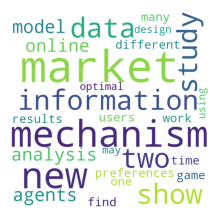

TypeError: object of type 'NoneType' has no len()

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate wordcloud
def generate_wordcloud(data):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(data)
    plt.figure(figsize = (2,2), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

# Top 3 authors from 9 biggest communities
largest_communities = df_community['Community'].value_counts().nlargest(9).index.tolist()


# Generate wordcloud for each community
for community in largest_communities:
    # Get the top 3 authors for the current community
    top_authors = top_authors_by_community.loc[top_authors_by_community['Community'] == community]['authorIds'].tolist()
    # Get the TF-IDF words for the current community
    tfidf_words = [word[0] for word in sorted(tfidf_scores[community].items(), key=lambda x: x[1], reverse=True)[:30]]
    # Combine the top 3 authors and top 50 words
    data = " ".join(top_authors) + " " + " ".join(tfidf_words)
    # Generate the wordcloud
    generate_wordcloud(data)
    
    top_names = []
    for i in range(len(authors)):
        for j in top_authors:
            if authors['authorId'][i] == j:
                top_names.append(authors['name'][i])
    
    print(top_names)
    

**Comment on your results. What can you conclude on the different sub-communities in Computational Social Science?**

From the wordclouds showing the sub-communities of Computational Social Science a clear tendency of writing about data and models is found. Nevertheless the less used words tends to be different between the sub-communities (which is expected). For instance the 2nd community is very much about political aspects including the media and online users, while the 4th and 5th community investigates economics in Computational Social Science. When considering all the sub-communities togehter, the word 'network' seems very important in all of them.

**Look up online the top author in each community. In light of your search, do your results make sense?**

According to the economical communities, authors such as David García whos main focus in his research is described as looking at topics of emotions, inequality, combining statistical analyses of large datasets of online interaction with computational models [1]. A clear tendency for the community he is apart of is using the word 'model' and 'information' which makes sense compared to his main interest and investigation. Another author in the 2nd sub-community is Yelena Mejova, whos research is described by concerning the use of social media in health informatics, especially in lifestyle diseases [2]. This is very relevant for the most used words in the corresponding community such as 'epidemic' as well as 'restictrions' being a part of this too. Concerning the health informatics it is represented by words such as 'mobility' and 'population'.

**References**

[1] https://www.csh.ac.at/researcher/david-garcia/

[2] https://sites.google.com/site/yelenamejova/